<a href="https://colab.research.google.com/github/ishika-mittal/Stock-Prices-Analytics-Dashboard/blob/main/Stochastic_Oscillator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Stochastic Oscillator**

1. It's a popular momentum indicator for generating overbought and oversold signals.

2. It compares a particular closing price of a security to a range of its prices over a certain period of time, i.e. SMA. 

3. The general assertion here is that in a market trending upward, prices will close near the high, and vice-versa.

4. It consists of two lines: one reflecting the actual value of the oscillator for each session, and one reflecting its three-day simple moving average. Because price is thought to follow momentum, the intersection of these two lines is considered to be a signal.

5. Divergence b/w the stochastic oscillator and trending price action is a reversal signal. Eg- when a bearish trend reaches a new lower low, but the oscillator prints a higher low, it may be an indicator that bears are exhausting their momentum and a bullish reversal is brewing.

6. It's range-bound bw 0-100.Traditionally, readings > 80 -> overbought, and readings < 20 oversold.

Details: https://www.investopedia.com/terms/s/stochasticoscillator.asp 

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Installing yfinance library for fetching historical stock data
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 6.3MB 11.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=156dd64013332f537336b63460d562104b75b86c3acff5a46d72155dd9ac4094
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
#Function to get the stock data
def stock_data(stock, start_date, end_date):

    tickerSymbol = stock

    #get data on this ticker
    tickerData = yf.Ticker(tickerSymbol)

    #get the historical prices for this ticker
    tickerDf = tickerData.history(period='1d', start=start_date, end=end_date)

    return tickerDf

In [4]:
#Fetching a 1Y dataset for better representation

df = stock_data("ITC.BO", "2020-06-08", "2021-06-08")
df.reset_index(level="Date", inplace=True)
df.drop(columns = ['Dividends', 'Stock Splits'], inplace=True)

print(df.shape)
df.head()

(250, 6)


,Date,Open,High,Low,Close,Volume
0,2020-06-08,182.945035,184.074883,178.199672,178.742004,744734
1,2020-06-09,179.826649,186.289389,178.696801,179.510300,1341970
2,2020-06-10,180.052627,183.668142,179.284339,180.097824,1024793
3,2020-06-11,180.775730,181.905578,174.990912,175.894791,855456
4,2020-06-12,171.375387,176.482296,169.974373,175.352448,980250


In [5]:
#Creating a dataset with only Closing Price column and Date as index

data = df.sort_index(ascending=True,axis=0)
df1 = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    df1["Date"][i]=data['Date'][i]
    df1["Close"][i]=data["Close"][i]

df1.index=df1.Date
df1.drop("Date",axis=1,inplace=True)
print(df1.shape)
df1.head()

(250, 1)


,Close
Date,
2020-06-08,178.742
2020-06-09,179.51
2020-06-10,180.098
2020-06-11,175.895
2020-06-12,175.352


In [6]:
#Defining Function

def Stochastic_Oscillator(data, ticker):

  data1 = data

  #Upper and Lower Levels in 14 day window
  data1['H14'] = data1['High'].rolling(14).max()
  data1['L14'] = data1['Low'].rolling(14).min()

  #Current value of Stochastic Oscillator
  data1['%K'] = (data1['Close'] - data1['L14'])*100/(data1['H14'] - data1['L14'])
  #3-day MA of %K
  data1['%D'] = data1['%K'].rolling(3).mean()

  ticker['%K'] = data1['%K'].values
  ticker['%D'] = data1['%D'].values

  return ticker

In [7]:
#Implementing Function
Stochastic_Oscillator(df,df1)
df1.tail()

,Close,%K,%D
Date,,,
2021-06-01,209.374,74.848441,78.859846
2021-06-02,203.342,32.131153,66.013085
2021-06-03,203.439,17.999966,41.659853
2021-06-04,203.147,15.599910,21.910343
2021-06-07,205.726,36.799922,23.466599


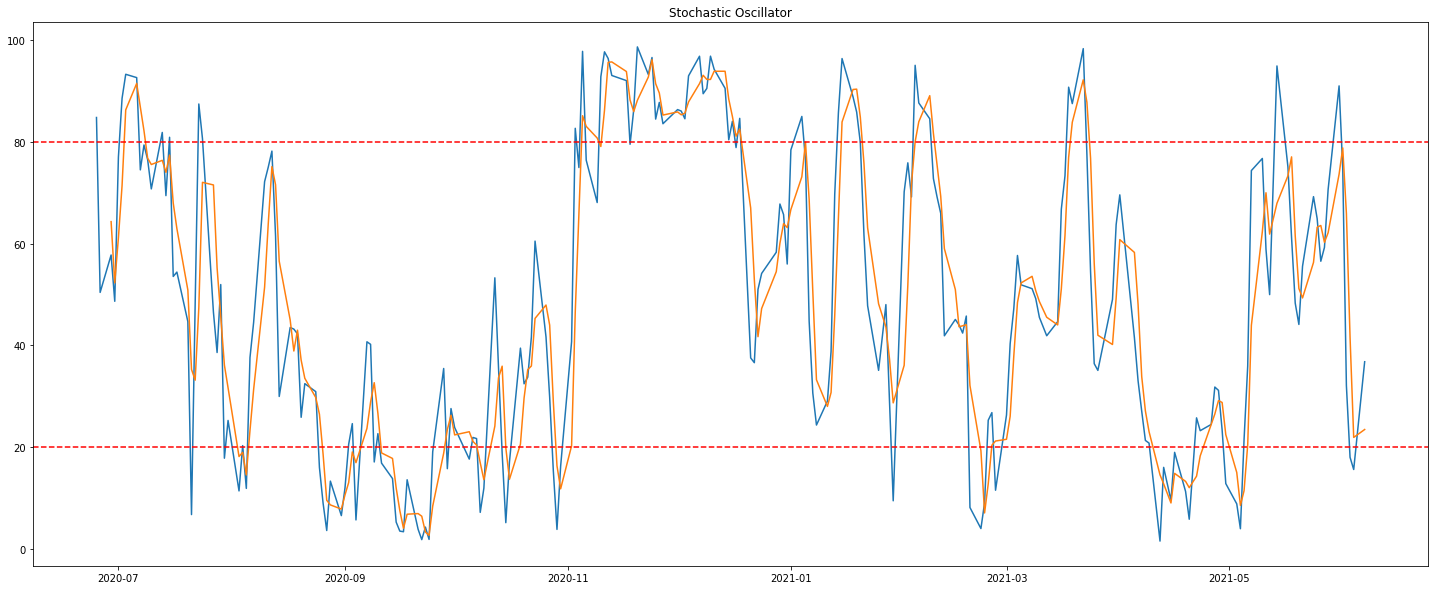

In [8]:
#Plotting Stochastic Oscillator
plt.figure(figsize=(25,10))
plt.plot(df1[['%K', '%D']])

plt.title("Stochastic Oscillator")
plt.axhline(20, linestyle='--', color="r")
plt.axhline(80, linestyle="--", color="r")

plt.show()